## Metastatic Cancer Prediction Model

## Import Modules and Load Data

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn

#To prevent column truncation in output
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)




In [18]:
#Training dataset
train_set = pd.read_csv("training.csv")

#Test dataset
test = pd.read_csv("test.csv")

#Sample submission
sample_submission = ("sample_submission_csv")

In [19]:
train_set.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,NaN,NaN,West,Pacific,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.100000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,19.100000,24563.57143,44.585714,8674.500000,2.646343e+05,1165.000000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,11.614286,39.557143,61.528571,8.471429,13.428571,0.000000,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,NaN,NaN,West,Pacific,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,10.248485,5.951515,3.503030,49.893939,50.106061,50.245455,9.827273,35.290909,4.651515,3.622727,61.736364,102741.63640,2.327273,1.536364,2.648485,2.178788,2.409091,5.163636,7.972727,13.936364,12.469697,19.760606,29.596970,49.357576,41287.27273,61.463636,11725.666670,6.776885e+05,2003.125000,34.753125,14.230303,19.987879,29.796970,23.739394,12.245455,35.984848,47.918182,65.230303,5.103030,15.224242,0.027273,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,C773,NaN,NaN,South,West South Central,21996.68333,626.236667,37.906667,13.028333,14.463333,12.531667,13.545000,12.860000,12.770000,11.426667,6.565000,2.811667,50.123333,49.876667,55.753333,12.330000,27.195000,4.710000,3.260667,55.801667,85984.74138,2.483333,1.305000,2.716667,2.938333,2.766667,6.763333,12.061667,15.835000,13.560000,20.875000,18.680000,39.555000,40399.03333,72.745000,7786.583333,2.377131e+05,1235.907407,29.358491,10.811667,27.038333,32.368333,19.678333,10.115000,29.793333,37.308475,66.428333,4.560000,13.722034,3.650847,75.820000,9.231667,3.618333,0.463333,0.146667,3.816667,6.898333,19.370000,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,C773,NaN,NaN,West,Pacific,32795.32558,1896.220930,42.871429,10.071429,12.135714,12.538095,12.464286,12.650000,14.847619,12.280952,8.216667,4.759524,49.066667,50.933333,52.604762,11.623810,31.142857,4.62

In [20]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Data columns (total 83 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient_id                             12906 non-null  int64  
 1   patient_race                           6521 non-null   object 
 2   payer_type                             11103 non-null  object 
 3   patient_state                          12855 non-null  object 
 4   patient_zip3                           12906 non-null  int64  
 5   patient_age                            12906 non-null  int64  
 6   patient_gender                         12906 non-null  object 
 7   bmi                                    3941 non-null   float64
 8   breast_cancer_diagnosis_code           12906 non-null  object 
 9   breast_cancer_diagnosis_desc           12906 non-null  object 
 10  metastatic_cancer_diagnosis_code       12906 non-null  object 
 11  me

## Data Pre-Processing and Feature Engineering

### Missing Data

<AxesSubplot:>

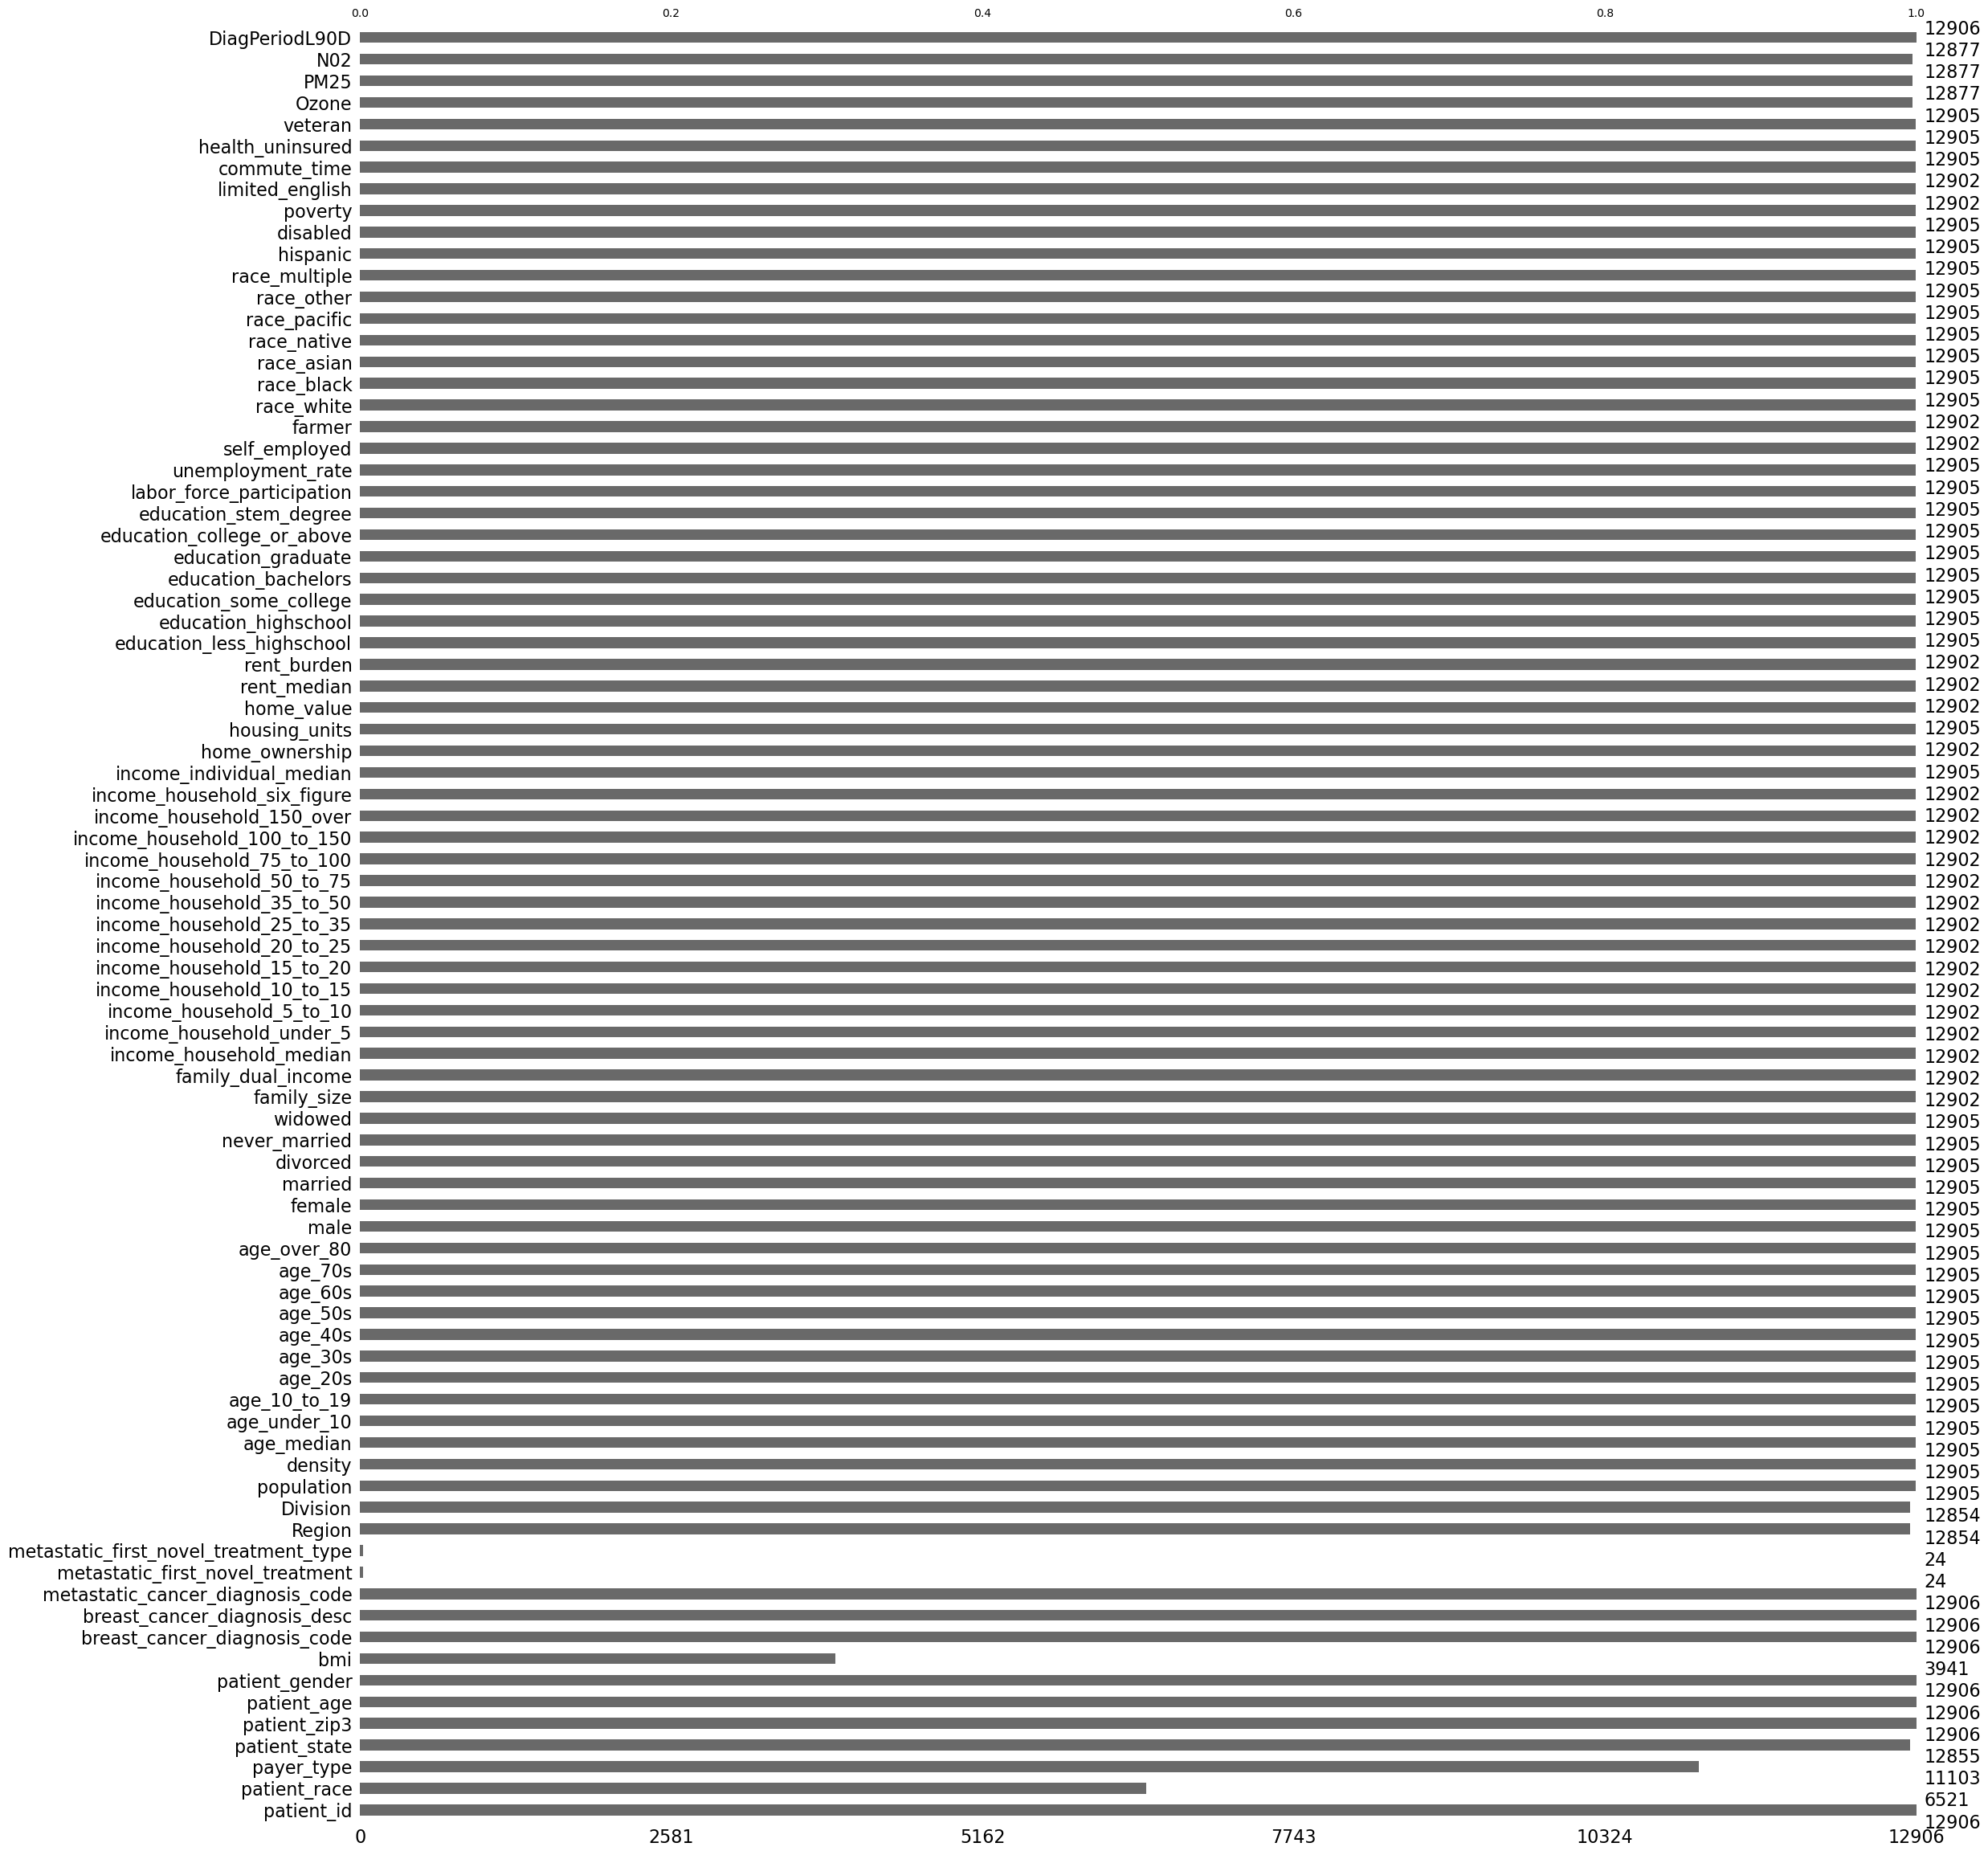

In [22]:
#using Missingno module to visualize the distribution of missing data
msn.bar(train_set)

The bar chart above shows some columns with significantly high numbers of missing data, with some having almost all data missing. Understanding percentages of the missing data will help to better determine best approaches to handle the columns with missing data.

In [23]:
# Calculate the percentage of missing values for each column

missing_percentage = (train_set.isnull().mean() * 100).round(2)

# Create a DataFrame to display the results
missing_info = pd.DataFrame({
    'Column': missing_percentage.index,
    'Missing Percentage': missing_percentage.values
})

In [24]:
missing_info["Missing Percentage"] = missing_info["Missing Percentage"].astype(float)

missing_info.sort_values(by='Missing Percentage', ascending=False)

,Column,Missing Percentage
11,metastatic_first_novel_treatment,99.81
12,metastatic_first_novel_treatment_type,99.81
7,bmi,69.46
1,patient_race,49.47
2,payer_type,13.97
...,...,...
8,breast_cancer_diagnosis_code,0.00
6,patient_gender,0.00
5,patient_age,0.00
4,patient_zip3,0.00


In [25]:

missing_info[missing_info['Missing Percentage'] > 0]

,Column,Missing Percentage
1,patient_race,49.47
2,payer_type,13.97
3,patient_state,0.40
7,bmi,69.46
11,metastatic_first_novel_treatment,99.81
...,...,...
77,health_uninsured,0.01
78,veteran,0.01
79,Ozone,0.22
80,PM25,0.22


The percentage of missing values in the following columns are between 49.5% and 99.8%. These values are too high to be useful to the model; hence, we will drop these columns;
- Patient race
- bmi
- metastatic first novel treatment
- metastatic first novel treatment type

In [26]:
train = train_set.drop(columns = ['patient_race', 
                      'bmi', 
                      'metastatic_first_novel_treatment', 
                      'metastatic_first_novel_treatment_type'])

train.head() #Confirming successful column drop

,patient_id,payer_type,patient_state,patient_zip3,patient_age,patient_gender,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,MEDICAID,CA,924,84,F,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,West,Pacific,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.100000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,19.100000,24563.57143,44.585714,8674.500000,2.646343e+05,1165.000000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,11.614286,39.557143,61.528571,8.471429,13.428571,0.000000,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,COMMERCIAL,CA,928,62,F,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,West,Pacific,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,10.248485,5.951515,3.503030,49.893939,50.106061,50.245455,9.827273,35.290909,4.651515,3.622727,61.736364,102741.63640,2.327273,1.536364,2.648485,2.178788,2.409091,5.163636,7.972727,13.936364,12.469697,19.760606,29.596970,49.357576,41287.27273,61.463636,11725.666670,6.776885e+05,2003.125000,34.753125,14.230303,19.987879,29.796970,23.739394,12.245455,35.984848,47.918182,65.230303,5.103030,15.224242,0.027273,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,COMMERCIAL,TX,760,43,F,C50112,Malignant neoplasm of central portion of left ...,C773,South,West South Central,21996.68333,626.236667,37.906667,13.028333,14.463333,12.531667,13.545000,12.860000,12.770000,11.426667,6.565000,2.811667,50.123333,49.876667,55.753333,12.330000,27.195000,4.710000,3.260667,55.801667,85984.74138,2.483333,1.305000,2.716667,2.938333,2.766667,6.763333,12.061667,15.835000,13.560000,20.875000,18.680000,39.555000,40399.03333,72.745000,7786.583333,2.377131e+05,1235.907407,29.358491,10.811667,27.038333,32.368333,19.678333,10.115000,29.793333,37.308475,66.428333,4.560000,13.722034,3.650847,75.820000,9.231667,3.618333,0.463333,0.146667,3.816667,6.898333,19.370000,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,COMMERCIAL,CA,926,45,F,C50212,Malig neoplasm of upper-inner quadrant of left...,C773,West,Pacific,32795.32558,1896.220930,42.871429,10.071429,12.135714,12.538095,12.464286,12.650000,14.847619,12.280952,8.216667,4.759524,49.066667,50.933333,52.604762,11.623810,31.142857,4.623810,3.098095,54.564286,120533.83330,3.435714,1.273810,2.180952,2.211905,2.100000,4.380952,5.885714,10.897619,10.721429,18.850000,38.057143,56.907143,55336.28571,

For the rest of the columns with low percentages of null rows, the missing data will be imputed with estimated values based on each column's needs

In [28]:
#payer_type with 13.97% of data missing

train['payer_type'].head()

0      MEDICAID
1    COMMERCIAL
2    COMMERCIAL
3    COMMERCIAL
4    COMMERCIAL
Name: payer_type, dtype: object

In [29]:
train['payer_type'].value_counts()

COMMERCIAL            6032
MEDICAID              2569
MEDICARE ADVANTAGE    2502
Name: payer_type, dtype: int64

<AxesSubplot:>

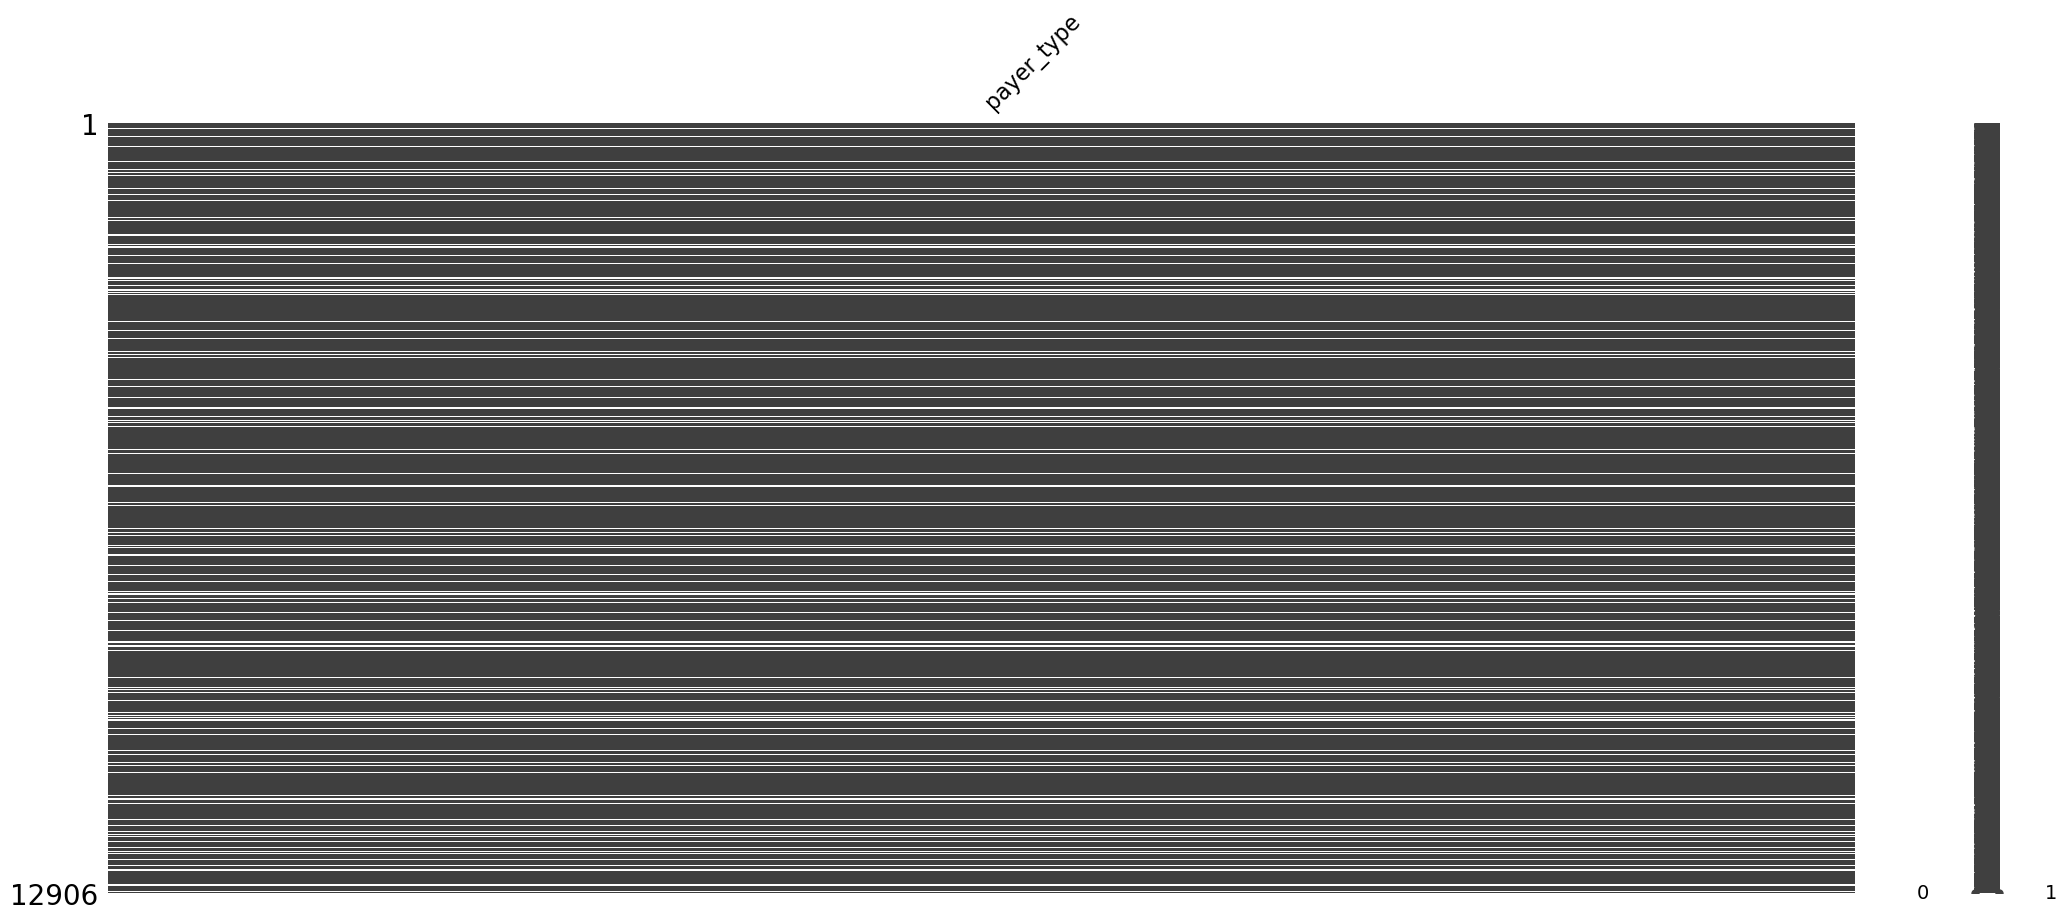

In [33]:
#Checking whether there is a pattern in the missingness; the data in this column seems to be missing at random

payer_type_subset = pd.DataFrame(train['payer_type'])
msn.matrix(payer_type_subset)

In [36]:
#impute the missing rows with "UNKNOWN"

train['payer_type'].fillna('UNKNOWN', inplace=True)
train['payer_type'].value_counts()

COMMERCIAL            6032
MEDICAID              2569
MEDICARE ADVANTAGE    2502
UNKNOWN               1803
Name: payer_type, dtype: int64

In [51]:
"""Checking skewness to determine if there may be concerns 
about imputing numeric columns with the mean 
(if column data too skewed, better option would be the mode)"""

for column in train:
    if train[column].isna().sum() > 0:
        if train[column].dtype == 'int64' or train[column].dtype == 'float64':
            skewness = train[column].skew()
            print(column, " ", skewness)

population   0.9976671384912528
density   4.040191665611303
age_median   0.2941740292306184
age_under_10   -0.10988419260321437
age_10_to_19   1.2568177691518527
age_20s   2.117028165248512
age_30s   0.9549065888784517
age_40s   -0.325615805997724
age_50s   -0.13337023559548006
age_60s   0.6754506355981723
age_70s   1.0895315157874546
age_over_80   2.6328256973902855
male   0.7660630840604239
female   -0.7661423950331259
married   -0.7687232087616692
divorced   0.0582554772468598
never_married   0.8518544038149493
widowed   1.5378307232152508
family_size   0.7537053879492308
family_dual_income   -0.510570700961349
income_household_median   1.111185208028617
income_household_under_5   1.9201271976022671
income_household_5_to_10   1.6025294282010825
income_household_10_to_15   1.0205072914126039
income_household_15_to_20   0.8693404446923003
income_household_20_to_25   0.714677547710587
income_household_25_to_35   0.13590773021585764
income_household_35_to_50   -0.08228106525711329
incom

In [52]:
for column in train:
    
    if train[column].isna().sum() > 0:
        if train[column].dtype == "float64" or train[column].dtype == "int64":
            
            # Fill missing values for numeric columns with the mean of each column
            train[column] = train[column].fillna(train[column].mean())
        
        else:  # column data type is object
            
            # Fill missing values for object columns with the mode of each column
            train[column] = train[column].fillna(train[column].mode().iloc[0])


In [53]:
#No more missing data :)
train.isna().sum()

patient_id                          0
payer_type                          0
patient_state                       0
patient_zip3                        0
patient_age                         0
patient_gender                      0
breast_cancer_diagnosis_code        0
breast_cancer_diagnosis_desc        0
metastatic_cancer_diagnosis_code    0
Region                              0
Division                            0
population                          0
density                             0
age_median                          0
age_under_10                        0
age_10_to_19                        0
age_20s                             0
age_30s                             0
age_40s                             0
age_50s                             0
age_60s                             0
age_70s                             0
age_over_80                         0
male                                0
female                              0
married                             0
divorced    